# Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

# Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# Importing Library 

In [1]:
import pandas as pd
import numpy as np
# Data Visulaisation
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset and Understanding Data

In [2]:
df=pd.read_csv(r"C:\Users\kraka\OneDrive\Desktop\Upgrad_AI_ML\Regression\Assignment_BikeSharing\day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
# Check for NuLL value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# analyzing the statistical values of numerical variable
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# We dont have any null valus as per the previous line but again checking for double confirmation .And we confirmed that theire is no missing or NULL value available in dataframe
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
df['instant'].value_counts()


1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [10]:
# Dropping "instant" column since its index type column and wil not be useful in building the model.
df.drop(["instant"], axis=1 , inplace=True)

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Dropping "dteday" column since other columns like "yr" ,"mnth","weekday" all together providing same information.
df.drop(["dteday"], axis=1 , inplace=True)

In [13]:
#converting numeric value in season to categorical type
df.season =df.season.map({1:"Spring",2:"Summer",3:"Ffall",4:"Winter"})

In [14]:
#converting numeric value in weekday to categorical type
df.weekday=df.weekday.map({0:"SUN",1:"MON",2:"TUE",3:"WED",4:"THU",5:"FRI",6:"SAT"})

In [15]:
#converting numeric value in Weathersit to categorical type
df.weathersit=df.weathersit.map({1:"clear__Few_partly clouds",2:"Mist_Broken_cloudy",3:"light_snow_light rain_thunderstorm",4:"heavy_rainIcePallet_fog"})

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,SAT,0,Mist_Broken_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,SUN,0,Mist_Broken_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,MON,1,clear__Few_partly clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,TUE,1,clear__Few_partly clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,WED,1,clear__Few_partly clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# converting numeric value in mnth to categorical type
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [18]:
# converting numeric value in yr to categorical type
#df.yr = df.yr.map({0:"2018",1:"2019"})

In [19]:
# converting numeric value in workingday to categorical type
#df.workingday = df.workingday.map({1:"WeekDay",0:"Weekend and Holiday"})

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,SAT,0,Mist_Broken_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,SUN,0,Mist_Broken_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,MON,1,clear__Few_partly clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,TUE,1,clear__Few_partly clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,WED,1,clear__Few_partly clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,SAT,0,Mist_Broken_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,SUN,0,Mist_Broken_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,MON,1,clear__Few_partly clouds,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,TUE,1,clear__Few_partly clouds,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,WED,1,clear__Few_partly clouds,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# EDA and Data Visulaization

In [24]:
#Segregate the  numerical and categorical value while seeing the above data with the help on df.nunique()

In [25]:
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
num_cols = ["temp","atemp","hum","windspeed"]

Analysiing Categorical Variable

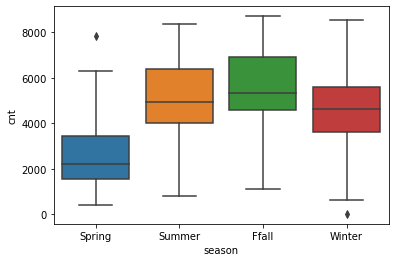

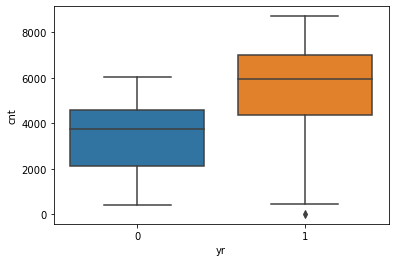

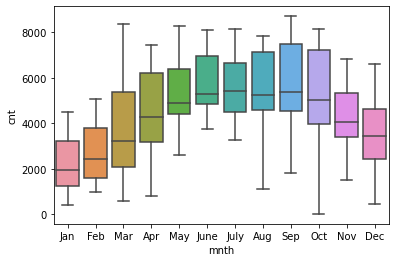

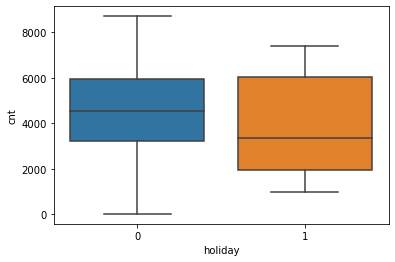

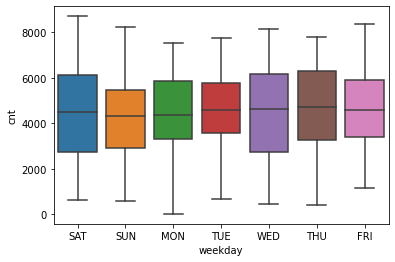

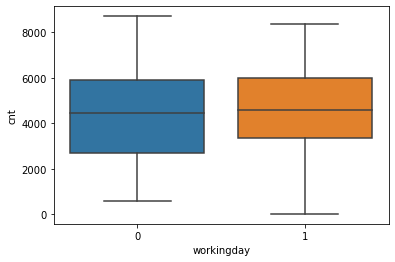

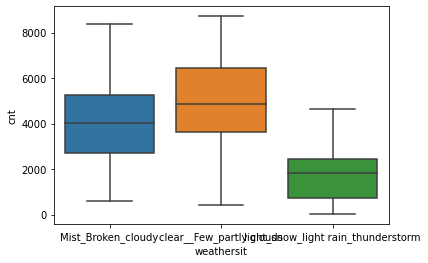

In [26]:
for i in cat_cols: 
    sns.boxplot(x=df[i],y="cnt",data=df) 
    plt.show()

Observation:

1. is high in summer and fall season.
2.Count is more in 2019 as compared to 2018.
3.Count is more in month june to october.
4.More people prefer to rent bike on working days and during holiday people prefer to stay home.
5.Bike rentout most when the sky is clear or partly clouds
6. there is a holiday, demand has decreased.
7.During September, bike sharing is more. During the year end and beginning,t may be due to extream weather condition

Analyzing Numerical Variables


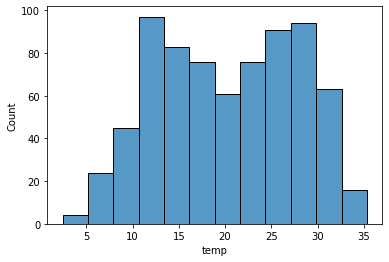

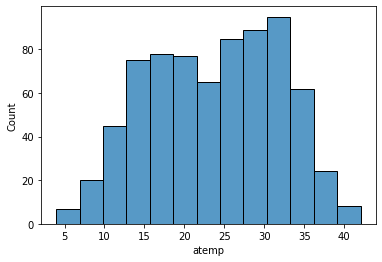

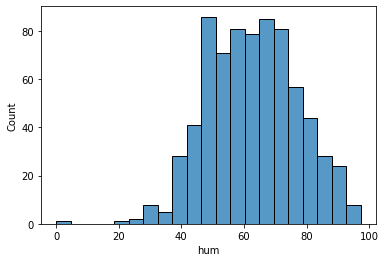

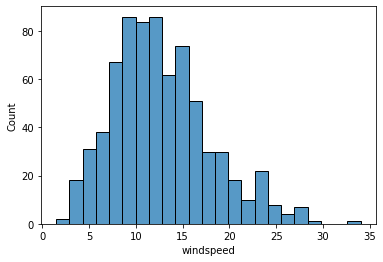

In [27]:
for i in num_cols: 
    sns.histplot(x=df[i],data=df) 
    plt.show()

 # Observation:

Count is high in Tempreture 15 & 30. 
Count is high in feeling Tempreture 30 
Count is more when windspeed is 7 -12.

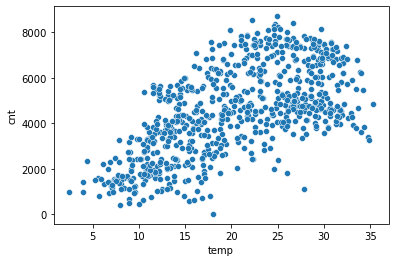

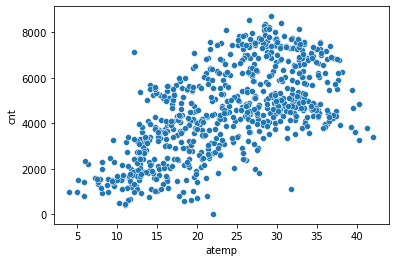

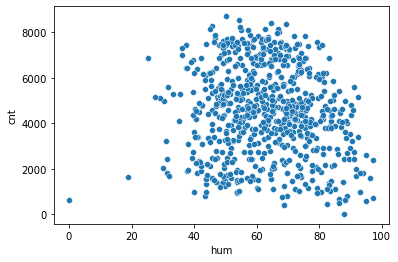

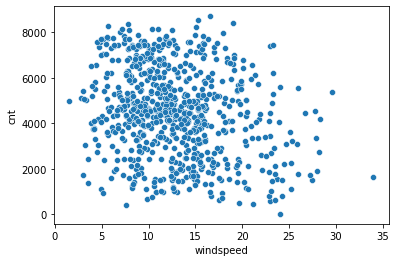

In [28]:
# Bivariate Analysis 
#sns.pairplot(df[num_cols]) 
#plt.show() 

for i in num_cols: 
    sns.scatterplot(x=df[i],y=df["cnt"]) 
    plt.show()

Observation
1. Windspeed are more scattered and we can see the count is deacreasing with the increase of windspeed
2. Count is decreasing with increase in humadity
3. We can see that count is increasing with tempreture indicating linear relation.

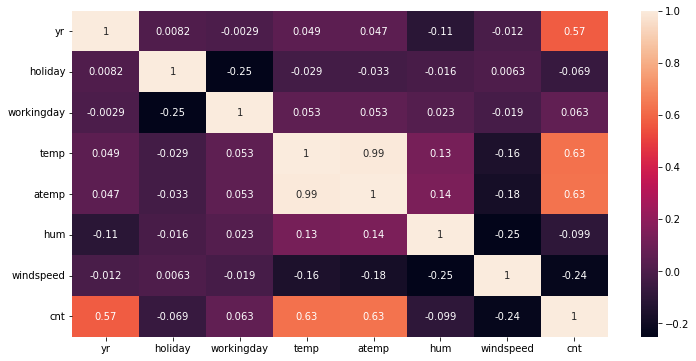

In [29]:
# Multivariate Analysis 
plt.figure(figsize=(12,6)) 
sns.heatmap(df.corr(),annot=True) 
plt.show()

Observation
1. Temp and atemp is highly correlated and can be removed from the observation.

In [30]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Preparing the Data

Create dummy variables for all categorical variables


In [31]:
df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [32]:
seasons_1 = pd.get_dummies(df.season,drop_first=True)
months_1 = pd.get_dummies(df.mnth,drop_first=True)
weekdays_1 = pd.get_dummies(df.weekday,drop_first=True)
weathersit_1 = pd.get_dummies(df.weathersit,drop_first=True)

In [33]:
seasons_1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
months_1.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [35]:
weekdays_1.head()

,MON,SAT,SUN,THU,TUE,WED
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [36]:
weathersit_1.head()

,clear__Few_partly clouds,light_snow_light rain_thunderstorm
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [37]:
# concating all the dataframe to the bike_sharing dataset
df_bike_sharing = pd.concat([df,seasons_1,months_1,weekdays_1,weathersit_1],axis=1)

In [38]:
df_bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
0,Spring,0,Jan,0,SAT,0,Mist_Broken_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,0
1,Spring,0,Jan,0,SUN,0,Mist_Broken_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,Spring,0,Jan,0,MON,1,clear__Few_partly clouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,Spring,0,Jan,0,TUE,1,clear__Few_partly clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,Spring,0,Jan,0,WED,1,clear__Few_partly clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [39]:
# Dropping season, mnth, weekday, weathersit columns.
df_bike_sharing.drop(["season","mnth","weekday","weathersit"], axis = 1, inplace = True)

In [40]:
df_bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [41]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yr                                  730 non-null    int64  
 1   holiday                             730 non-null    int64  
 2   workingday                          730 non-null    int64  
 3   temp                                730 non-null    float64
 4   atemp                               730 non-null    float64
 5   hum                                 730 non-null    float64
 6   windspeed                           730 non-null    float64
 7   cnt                                 730 non-null    int64  
 8   Spring                              730 non-null    uint8  
 9   Summer                              730 non-null    uint8  
 10  Winter                              730 non-null    uint8  
 11  Aug                                 730 non-n

In [42]:
df_bike_sharing.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'MON', 'SAT', 'SUN', 'THU',
       'TUE', 'WED', 'clear__Few_partly clouds',
       'light_snow_light rain_thunderstorm'],
      dtype='object')

# Splitting the Data into Training and Testing Sets

In [43]:
# Splitting the Data using train split in 70% train and 30% test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
# Apply scaler() to all the columns except the yr, holiday, workingday and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ,'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [46]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


In [47]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# creating the X anf y variable
y_train = df_train.pop("cnt")
X_train = df_train


In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

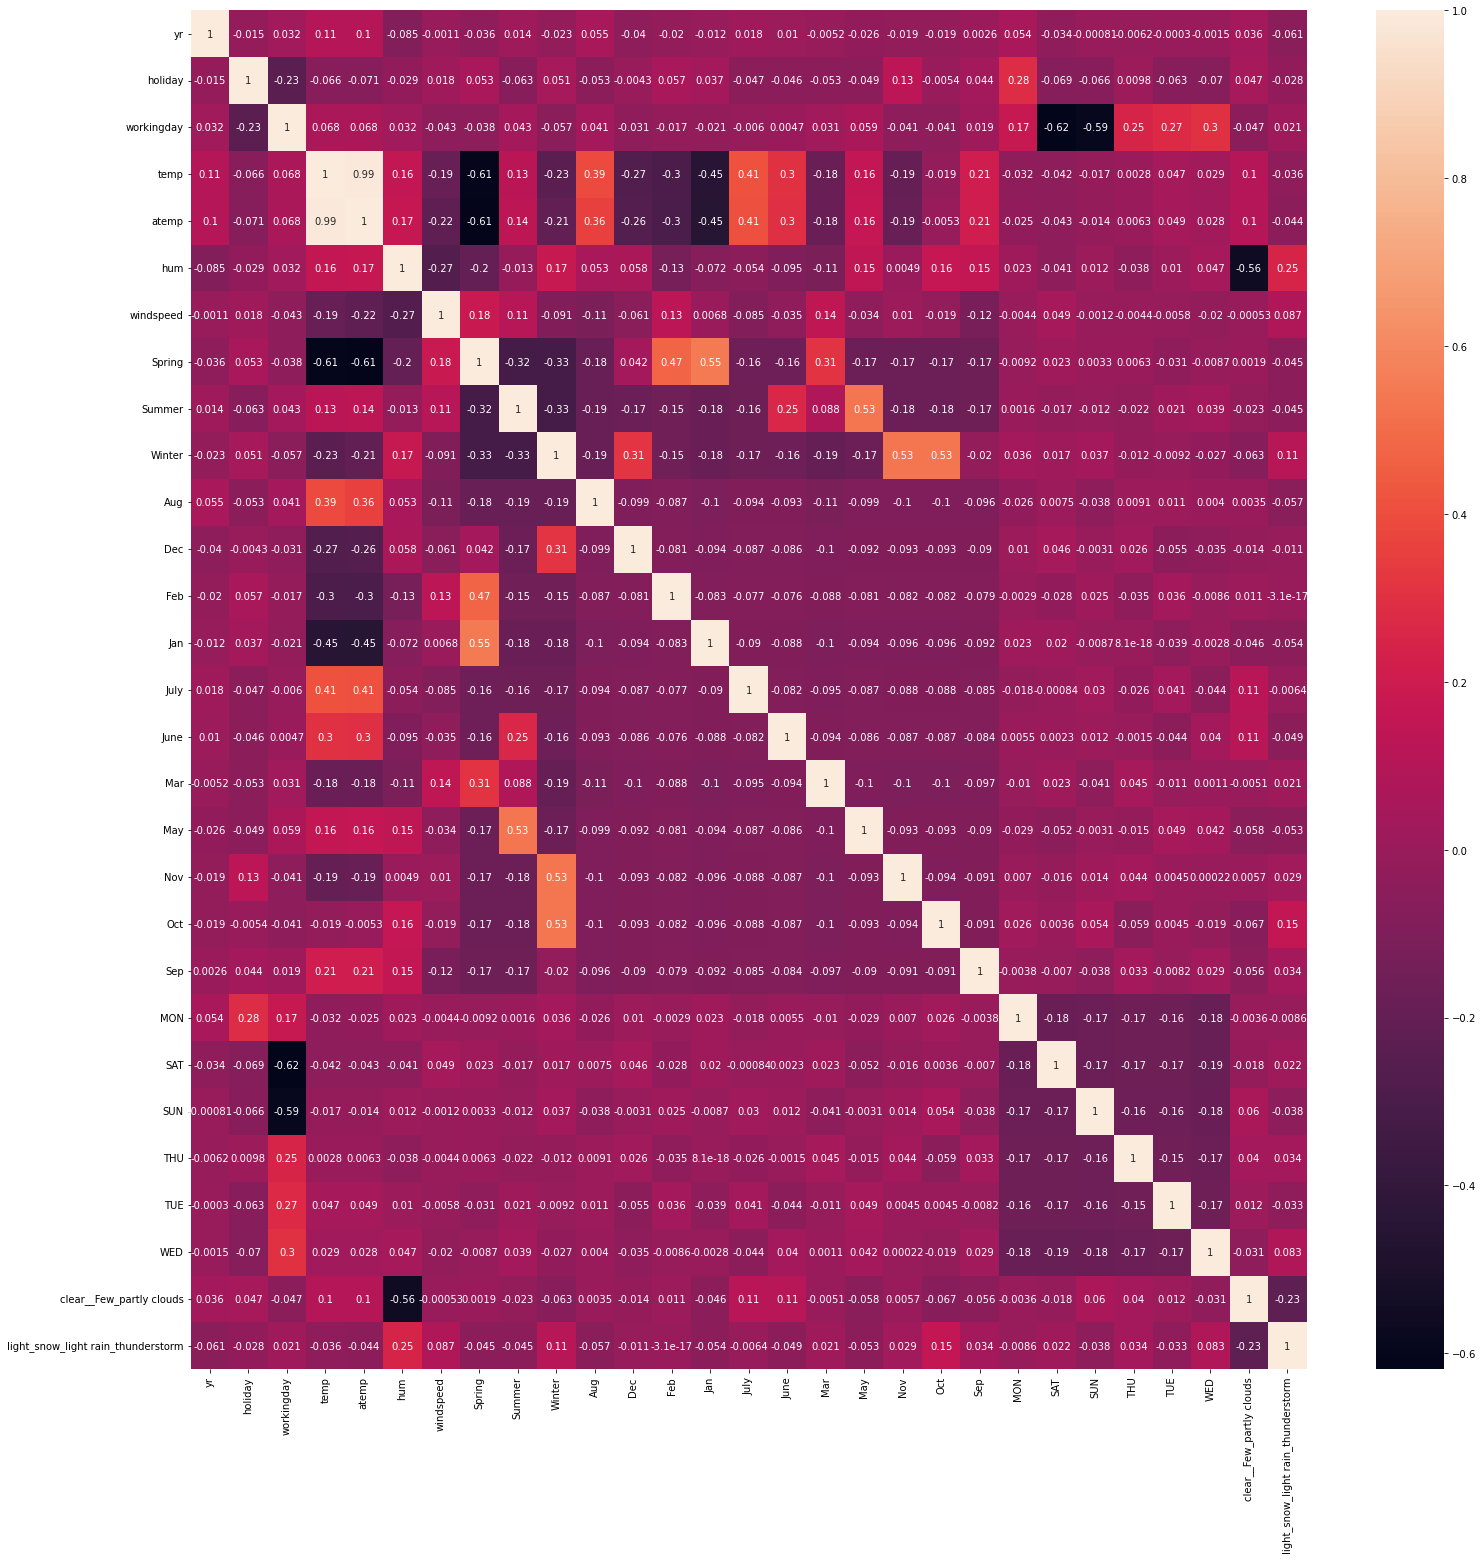

In [51]:
# Checking the  correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

# Model Building

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
lm

LinearRegression()

In [55]:
rfe = RFE(lm,n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 14),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', True, 1),
 ('Mar', False, 6),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', False, 13),
 ('MON', False, 8),
 ('SAT', True, 1),
 ('SUN', False, 7),
 ('THU', False, 15),
 ('TUE', False, 9),
 ('WED', False, 12),
 ('clear__Few_partly clouds', True, 1),
 ('light_snow_light rain_thunderstorm', True, 1)]

In [57]:
# selecting the RFE columns
column = X_train.columns[rfe.support_]
column

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Aug', 'July', 'June', 'Nov', 'SAT',
       'clear__Few_partly clouds', 'light_snow_light rain_thunderstorm'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Summer', 'Dec', 'Feb', 'Jan', 'Mar', 'May', 'Oct', 'Sep',
       'MON', 'SUN', 'THU', 'TUE', 'WED'],
      dtype='object')

In [59]:
X_train_rfe = X_train[column]


In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_rfe)

In [61]:
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model


In [62]:
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.78e-189
Time:                        22:18:59   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     494   BIC:                            -931.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Calculate VIF


In [63]:
# Calculate the VIFs for the 1st model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.04
4,hum,19.51
2,workingday,5.24
5,windspeed,4.29
13,clear__Few_partly clouds,3.25
6,Spring,2.86
7,Winter,2.75
0,yr,2.07
12,SAT,1.95
9,July,1.79


In [64]:
#Dropping temp,hum from the measure because of gigh VIF valus .Usally VIF value should be lies between 1 to 5 

X_train_new = X_train_rfe.drop(["hum","temp"], axis = 1)

In [65]:
X_train_new

,yr,holiday,workingday,windspeed,Spring,Winter,Aug,July,June,Nov,SAT,clear__Few_partly clouds,light_snow_light rain_thunderstorm
653,1,0,1,0.300794,0,1,0,0,0,0,0,1,0
576,1,0,1,0.264686,0,0,0,1,0,0,0,1,0
426,1,0,0,0.255342,1,0,0,0,0,0,1,0,0
728,1,0,0,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.188475,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.355596,0,0,0,0,1,0,0,0,0
578,1,0,1,0.187140,0,0,1,0,0,0,0,1,0
53,0,0,1,0.111379,1,0,0,0,0,0,0,1,0
350,0,0,0,0.431816,0,1,0,0,0,0,1,0,0


Model2 

Building the Second Model


In [66]:
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     124.0
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.75e-146
Time:                        22:18:59   Log-Likelihood:                 407.52
No. Observations:                 510   AIC:                            -787.0
Df Residuals:                     496   BIC:                            -727.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
# Calculate the VIFs for the 2nd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.76
2,workingday,3.56
11,clear__Few_partly clouds,2.65
5,Winter,2.19
0,yr,1.94
4,Spring,1.79
10,SAT,1.65
9,Nov,1.56
6,Aug,1.29
7,July,1.25


In [68]:
#Dropping Holiday,Winter and July from the measure because of high p valus .Usally p value should be <=0.05 

X_train_new = X_train_new.drop(["holiday","Winter","July"], axis = 1)

In [69]:
X_train_new

,yr,workingday,windspeed,Spring,Aug,June,Nov,SAT,clear__Few_partly clouds,light_snow_light rain_thunderstorm
653,1,1,0.300794,0,0,0,0,0,1,0
576,1,1,0.264686,0,0,0,0,0,1,0
426,1,0,0.255342,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,1,0
482,1,0,0.188475,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.355596,0,0,1,0,0,0,0
578,1,1,0.187140,0,1,0,0,0,1,0
53,0,1,0.111379,1,0,0,0,0,1,0
350,0,0,0.431816,0,0,0,0,1,0,0


Model -3

In [70]:
X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.5
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          6.65e-149
Time:                        22:18:59   Log-Likelihood:                 405.48
No. Observations:                 510   AIC:                            -789.0
Df Residuals:                     499   BIC:                            -742.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [71]:
# Calculate the VIFs for the 3rd model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.67
1,workingday,3.10
8,clear__Few_partly clouds,2.44
0,yr,1.91
7,SAT,1.51
3,Spring,1.50
4,Aug,1.18
5,June,1.16
6,Nov,1.15
9,light_snow_light rain_thunderstorm,1.10


In [72]:
#Dropping August,June and November from the measure because of high p valus .Usally p value should be <=0.05 

X_train_new = X_train_new.drop(["Aug","June","Nov"], axis = 1)

Model -4

In [73]:
X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.40e-143
Time:                        22:19:00   Log-Likelihood:                 384.22
No. Observations:                 510   AIC:                            -752.4
Df Residuals:                     502   BIC:                            -718.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
# Calculate the VIFs for the 4th model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.61
1,workingday,2.98
5,clear__Few_partly clouds,2.37
0,yr,1.90
4,SAT,1.48
3,Spring,1.36
6,light_snow_light rain_thunderstorm,1.09


We can consider the model 4, as it is having very low multicollinearity between the predictors and the p-values for all the predictors is significant. F-Statistics value of 206.5 (which is greater than 1) and the Prob (F-statistic) of 2.40e-143 i.e. almost equals to zero, states that the overall model is significant

const	0.4086
yr	0.2492
workingday	0.062
windspeed	-0.1946
Spring	-0.2653
SAT	0.0672
clear__Few_partly	0.0945
light_snow_light	-0.2148


From the Model 4  summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 206.5
Prob (F-statistic): 2.40e-143
The F-Statistics value of 206 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

The equation of best fitted surface based on model Model 4


cnt = 0.4086+ (yr × 0.2492) + (workingday × 0.062)  − (windspeed × 0.1946) - (Spring × 0.2653) + (SAT
 ×0.0672) - (light_snow_light × 0.2148) + (clear__Few_partly ×0.0945) 

In [75]:
y_train_pred = lm_4.predict(X_train_lm_4)


Text(0.5, 0, 'Errors')

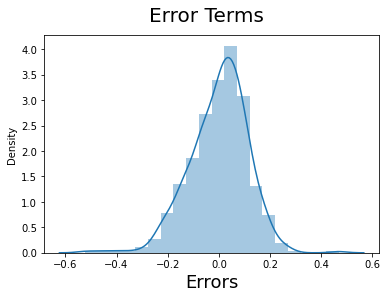

In [76]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Observation

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# PREDICTION USING FINAL MODEL

In [77]:
num_vars = ["temp","atemp", "hum", "windspeed" ,"cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [78]:
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,1,0,0,1,0


In [79]:
df_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,MON,SAT,SUN,THU,TUE,WED,clear__Few_partly clouds,light_snow_light rain_thunderstorm
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test


In [80]:
# creating the X and y variable
y_test = df_test.pop("cnt")
X_test = df_test

In [81]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [82]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

In [83]:
# checking the r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) 

In [84]:
r2

0.7038172219590334

MODEL EVALUATION


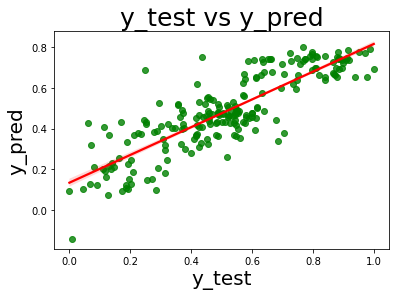

In [85]:
# Plotting y_test and y_pred to understand the spread.
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "Green"}, line_kws={"color": "Red"})
plt.title('y_test vs y_pred', fontsize=25)
plt.xlabel('y_test', fontsize=20)
plt.ylabel('y_pred', fontsize=20)
plt.show()

Observation

Graph shows test data and predicted data is linear. It means model is giving the accurate prediction.

1. r2 for test data is 0.7038172219590334
2. r2 for training data  is 0.742